In [1]:
from labeyrieClasses import target, fftw_psd
import numpy as np
import matplotlib.pyplot as plt
import ctypes
%matplotlib inline

In [2]:
binary = target()
binary.fits.fileName = "/home/niels/Documents/FITS/KP330.fits"
binary.fits.read(numDimensions = 3)

Filename: /home/niels/Documents/FITS/KP330.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      62   (512, 512, 1000)   float32   
None


In [3]:
# Testing PSD wrapper

# Use FFTW to calculate the PSD of a single image
# Input image = 512x512 ndarray of np.double32
# Output image = 

fftw_psd_dll = ctypes.CDLL('/home/niels/Dropbox/Thesis/Python/dev/fftw_psd.so')
imgsize = 512
psd_n = imgsize*(int(imgsize/2)+1)
img_n = imgsize**2

image512 = binary.fits.data[0]

# Reshape Square array to be flat
array = np.reshape(image512,(imgsize**2,1))

# Array type to be passed to wrapped C function
array_type = ctypes.c_double * img_n
# Set input argument to be flat array of doubles (# of input img pixels)
fftw_psd_dll.psd.argtypes = [ctypes.c_double * img_n]
# Set output argument to be flat array of doubles (# of output psd pixels)
fftw_psd_dll.psd.restype = ctypes.POINTER(ctypes.c_double * psd_n)

# Calculate PSD, get a pointer returned
array_ctype = array_type(*array)

psd_pointer = fftw_psd_dll.psd(array_ctype)

# Turn iterable pointer to array
psd_array = np.fromiter(psd_pointer.contents,np.float32,-1)
# Reshape array to image
psd_image = np.reshape(psd_array,(imgsize,int(imgsize/2+1)))

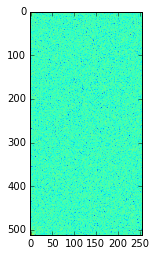

In [4]:
plt.imshow(np.log10(psd_image))